In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.8/974.8 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 52.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [2]:
import os
import zipfile

with zipfile.ZipFile('/content/test_pose_image_dir.zip') as target_fle:
    target_fle.extractall('/content/test_pose_image_dir')

print('test images = ', os.listdir('/content/test_pose_image_dir'))

test images =  ['test1.jpg', 'test3.jpg', 'test2.jpg']


# 테스트 이미지 display

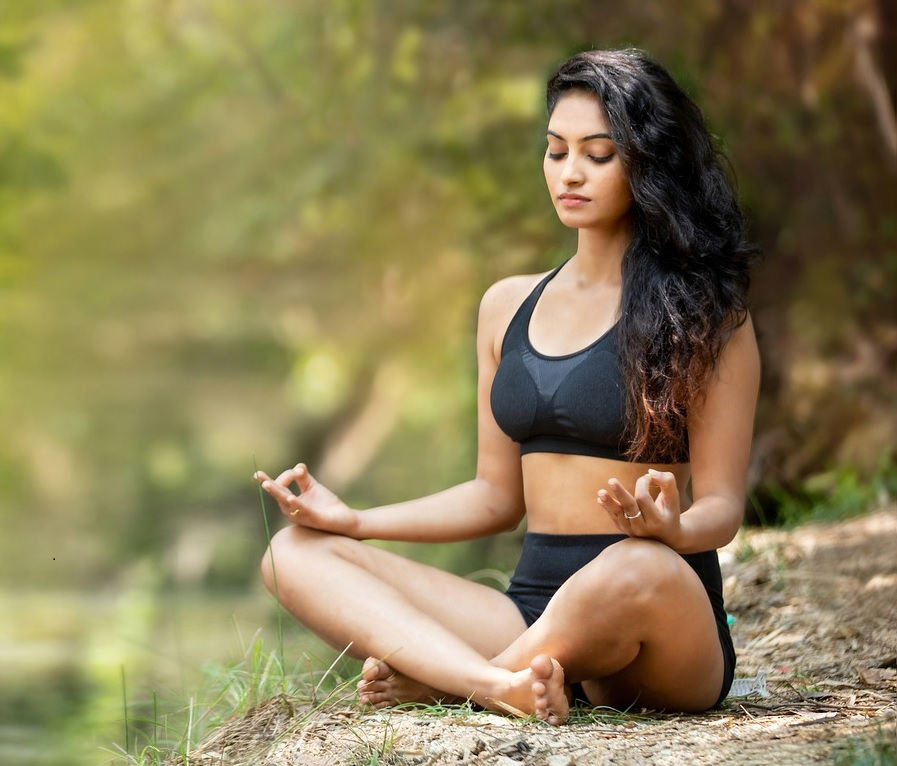

In [3]:
from PIL import Image
from IPython.display import Image

test_image = Image(filename='/content/test_pose_image_dir/test1.jpg')
display(test_image)

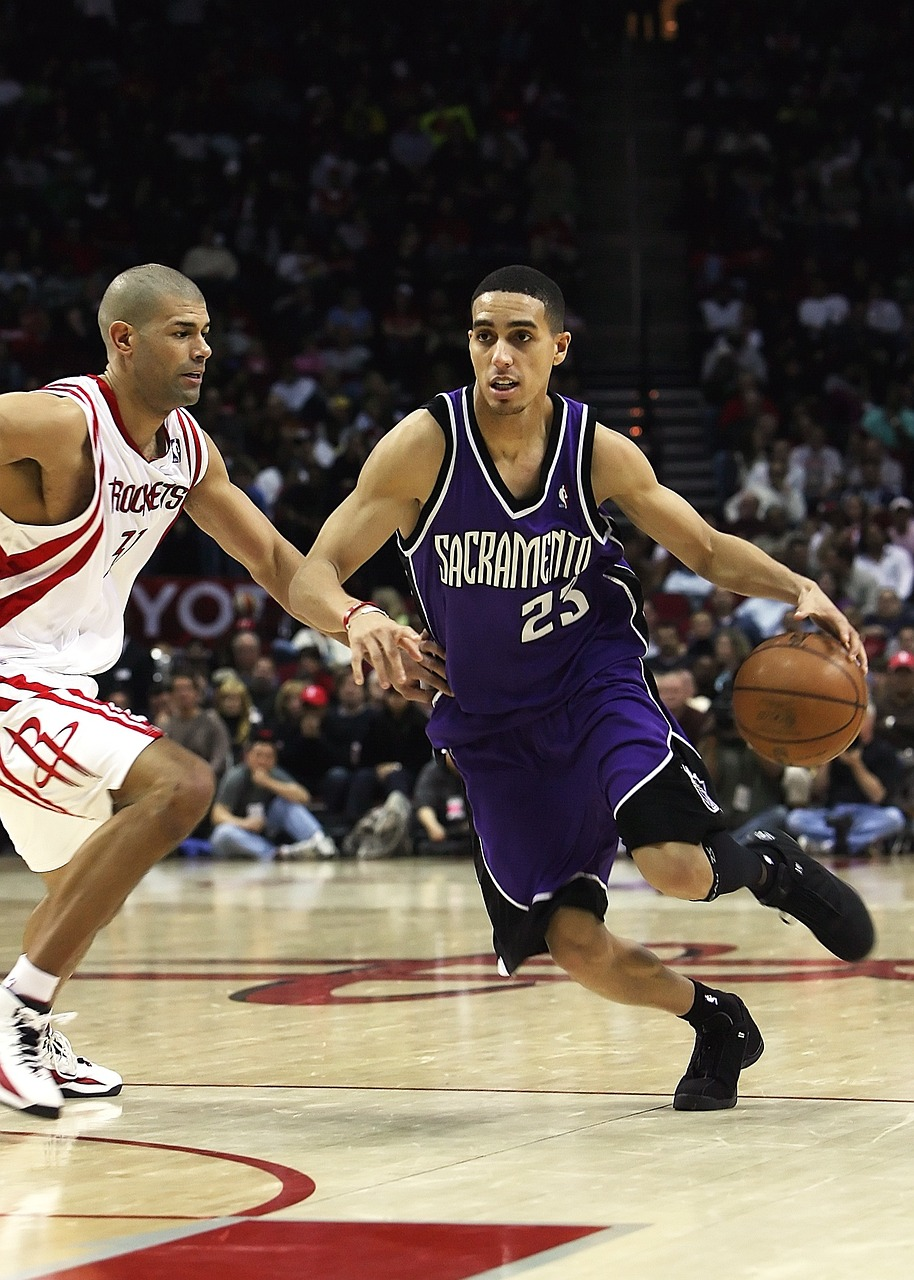

In [4]:
from PIL import Image
from IPython.display import Image

test_image = Image(filename='/content/test_pose_image_dir/test2.jpg')
display(test_image)

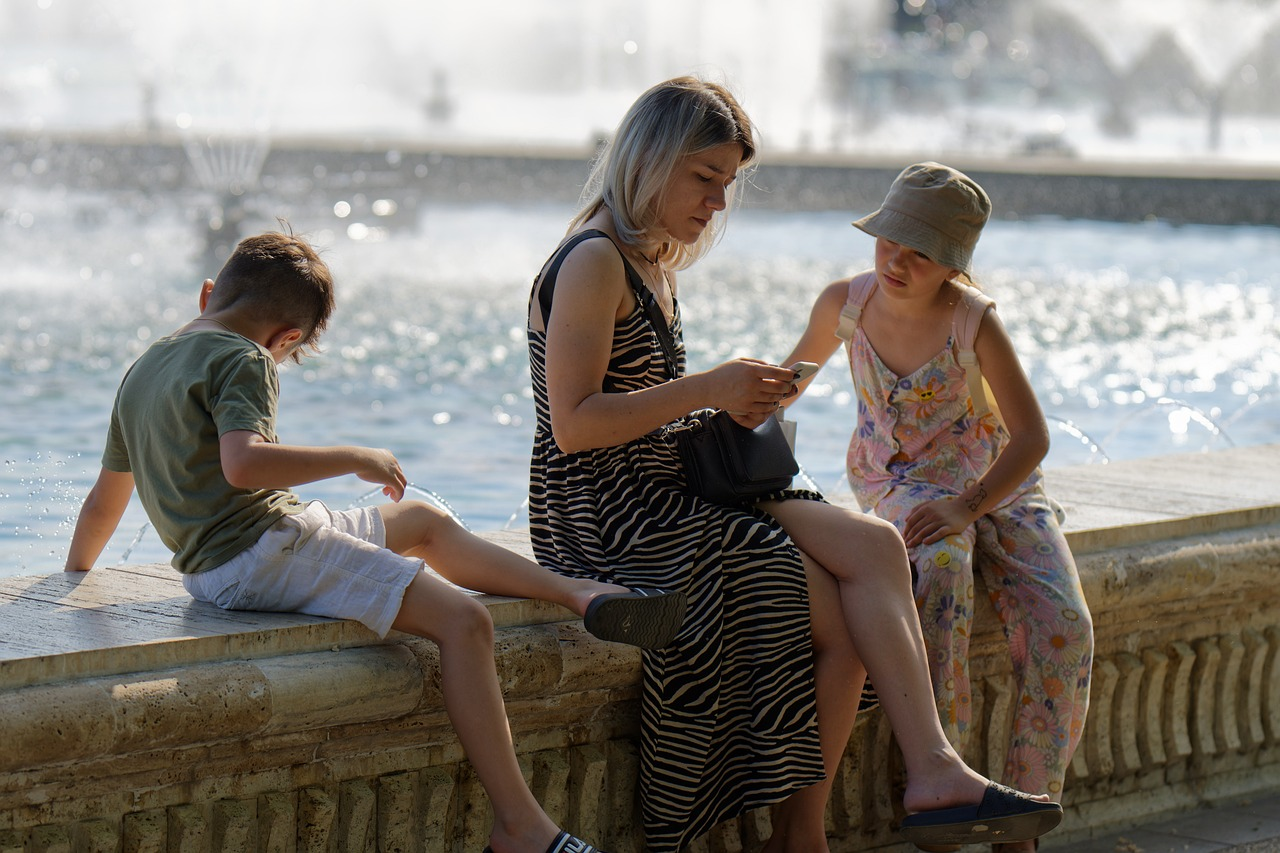

In [5]:
from PIL import Image
from IPython.display import Image

test_image = Image(filename='/content/test_pose_image_dir/test3.jpg')
display(test_image)

# Pose Estimation (Python version)

In [6]:
import ultralytics
from ultralytics import YOLO

model = YOLO('yolo11n-pose.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.97M/5.97M [00:00<00:00, 17.2MB/s]


# test image inference

In [7]:
results = model(source='/content/test_pose_image_dir/*.jpg', save=True)


image 1/3 /content/test_pose_image_dir/test1.jpg: 576x640 1 person, 437.6ms
image 2/3 /content/test_pose_image_dir/test2.jpg: 640x480 3 persons, 203.7ms
image 3/3 /content/test_pose_image_dir/test3.jpg: 448x640 3 persons, 206.2ms
Speed: 9.1ms preprocess, 282.5ms inference, 12.3ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/pose/predict


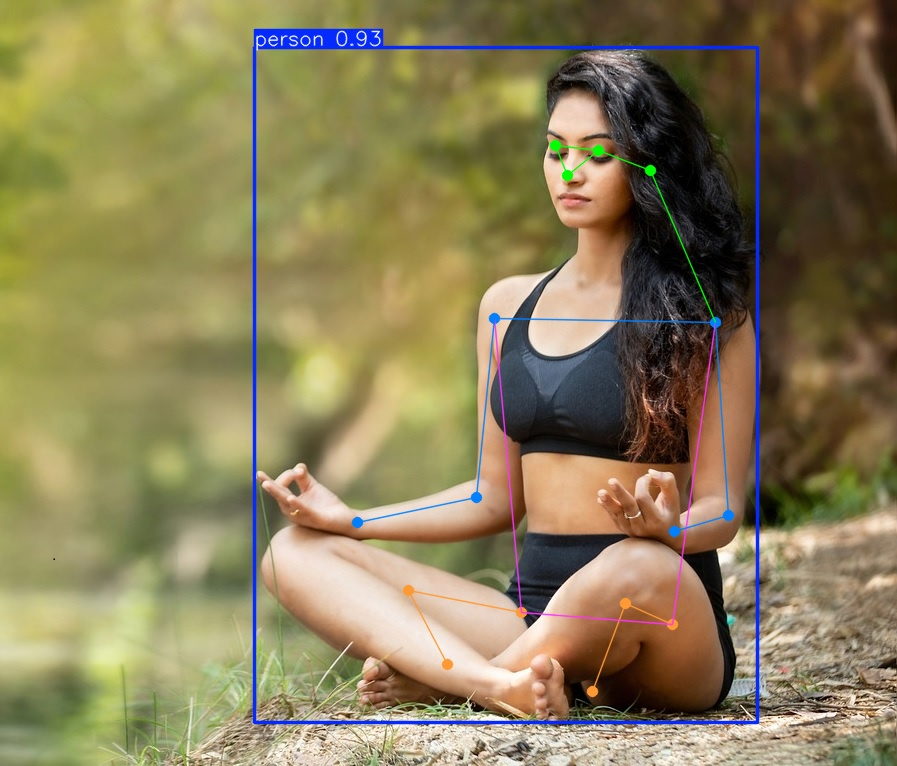

In [8]:
from PIL import Image
from IPython.display import Image

pred_image = Image(filename='/content/runs/pose/predict/test1.jpg')
display(pred_image)

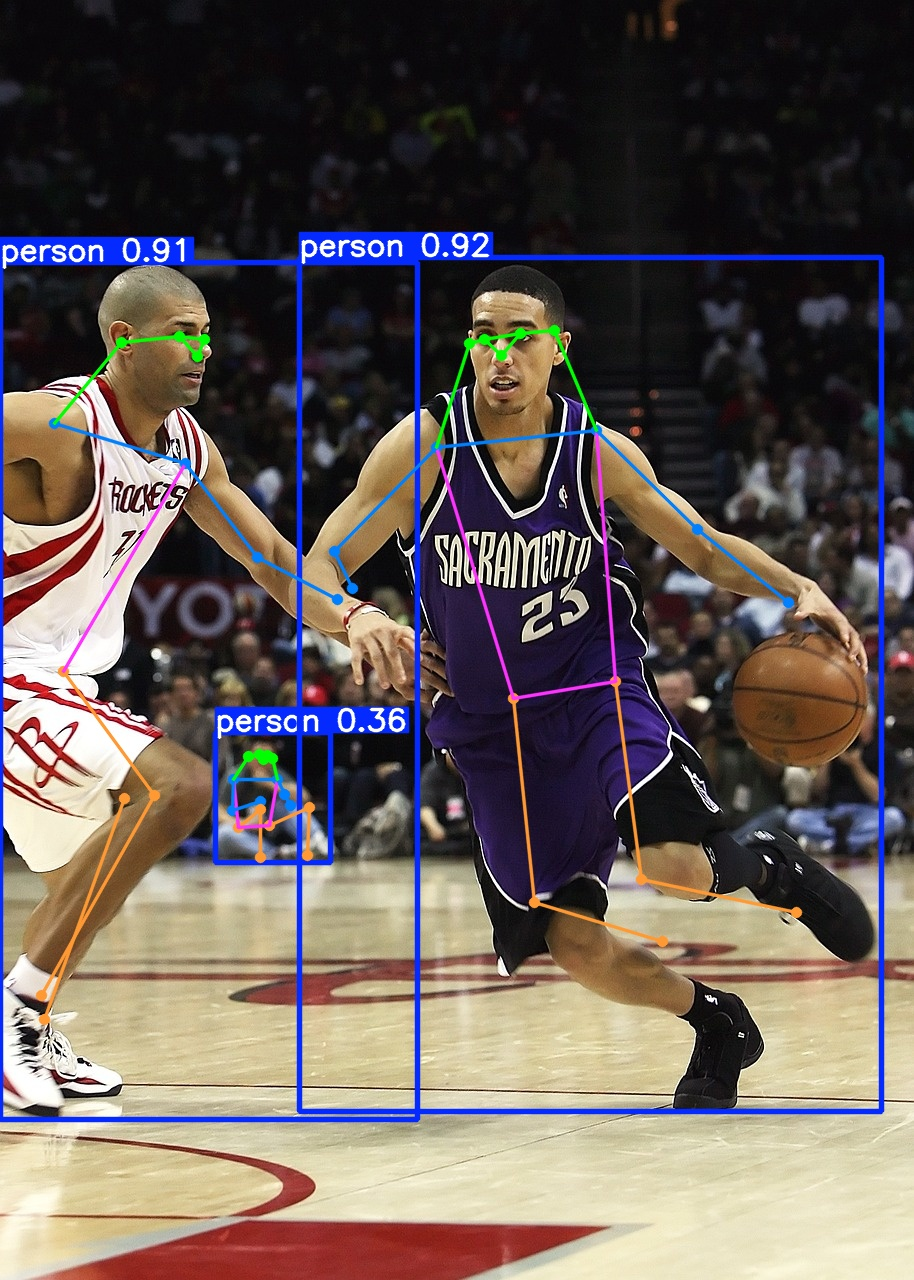

In [9]:
from PIL import Image
from IPython.display import Image

pred_image = Image(filename='/content/runs/pose/predict/test2.jpg')
display(pred_image)

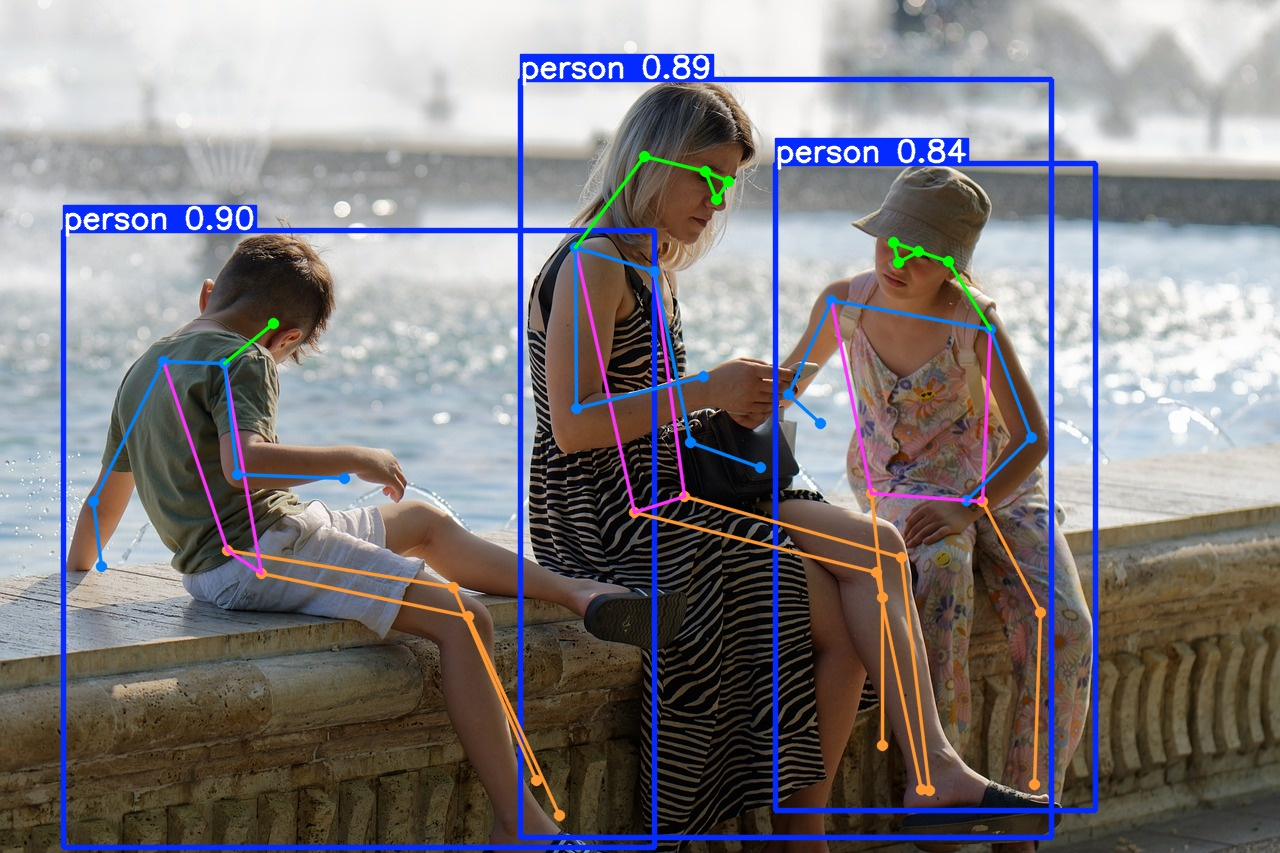

In [10]:
from PIL import Image
from IPython.display import Image

pred_image = Image(filename='/content/runs/pose/predict/test3.jpg')
display(pred_image)

In [11]:
import glob

pose_image_list = glob.glob(('/content/runs/pose/predict/*.jpg'))

pose_image_nums = len(pose_image_list)

print(pose_image_nums)

print(pose_image_list)

3
['/content/runs/pose/predict/test1.jpg', '/content/runs/pose/predict/test3.jpg', '/content/runs/pose/predict/test2.jpg']


In [13]:
# 다운로드를 위한 inference image 압축

import zipfile
import os

if not os.path.exists('/content/pose_estimation/'):
    os.mkdir('/content/pose_estimation/')
    print('pose_estimation dir is created !!!')


with zipfile.ZipFile('/content/pose_estimation/pose_estimation_images.zip', 'w') as pose_images:

    for idx in range(pose_image_nums):
        pose_images.write(pose_image_list[idx])

pose_estimation dir is created !!!
